# Self Organized Map (SOM) general workflow

## Intuitive description
SOM is an unsupervised learning algorithm for reducing dimentionality (to 2D). There is no activation function or output layer. SOM puts the NN nodes on a 2D array (figure 1 and 2), and weights are not parameters which are multiplied by input variables towards the next layer. In other words, weights are kind of coordinates of nodes which characterize the property of each node.
Weights are updated by calculating the distance detween input variables and weights (figure 2), deciding the closest node (Best Mactching Unit, BMU), update the weights of BMU and its surrounding nodes (figure 3). The algorithm repeats this process and makes a map classifying the nodes with gradation (figure 4). An example is shown in figure 5.
 

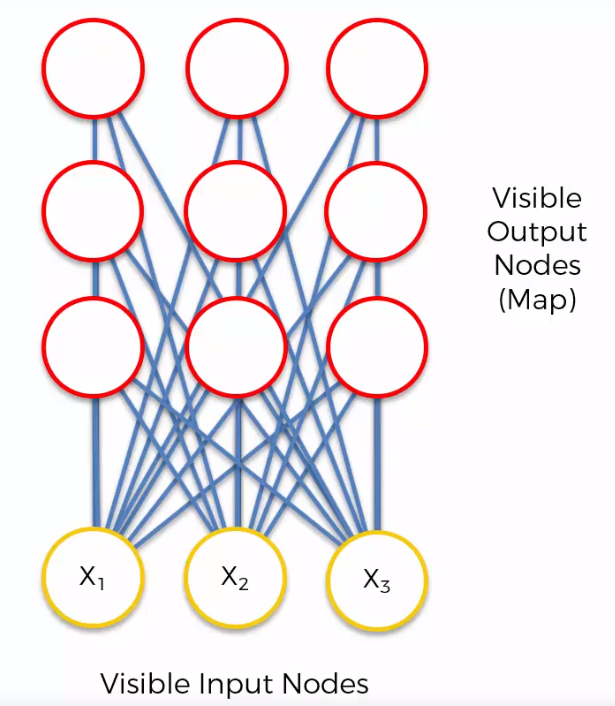

In [88]:
from IPython.display import Image, display_png
display_png(Image('figure1.PNG'))

figure 1. copyright:SuperDataScience

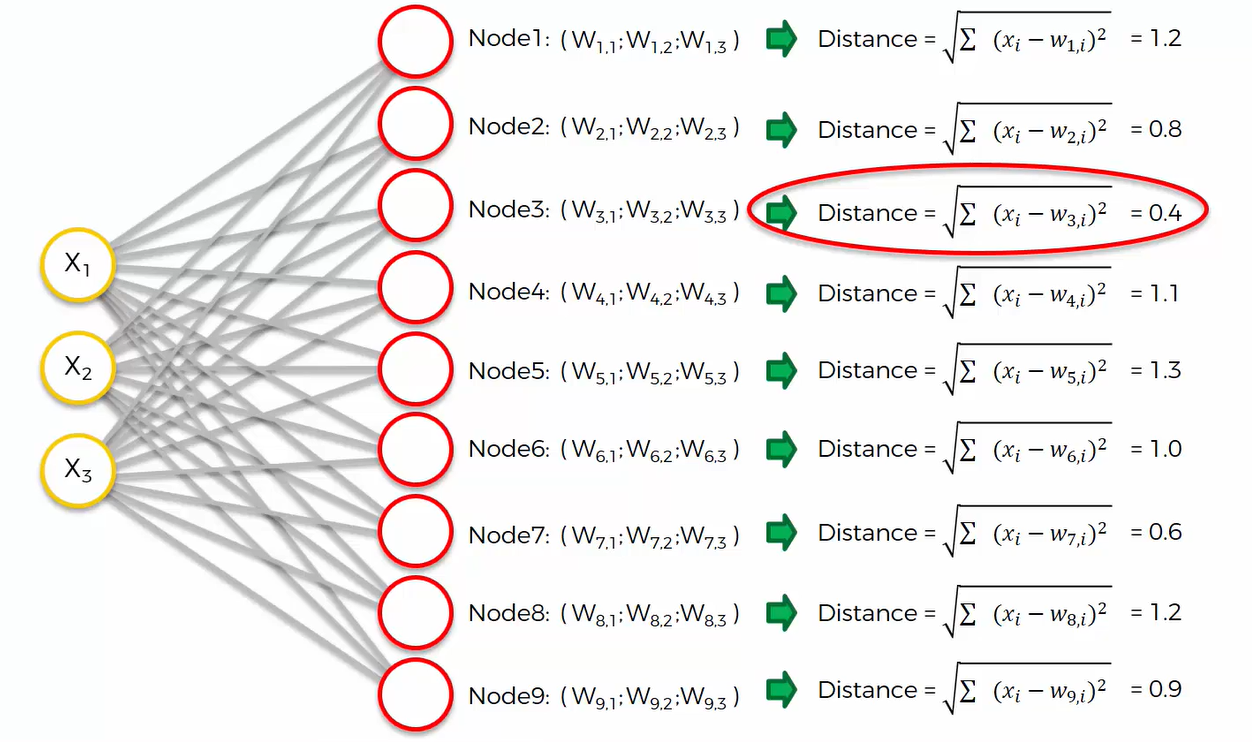

In [5]:
from IPython.display import Image, display_png
display_png(Image('figure2.PNG'))

figure 2. copyright:SuperDataScience

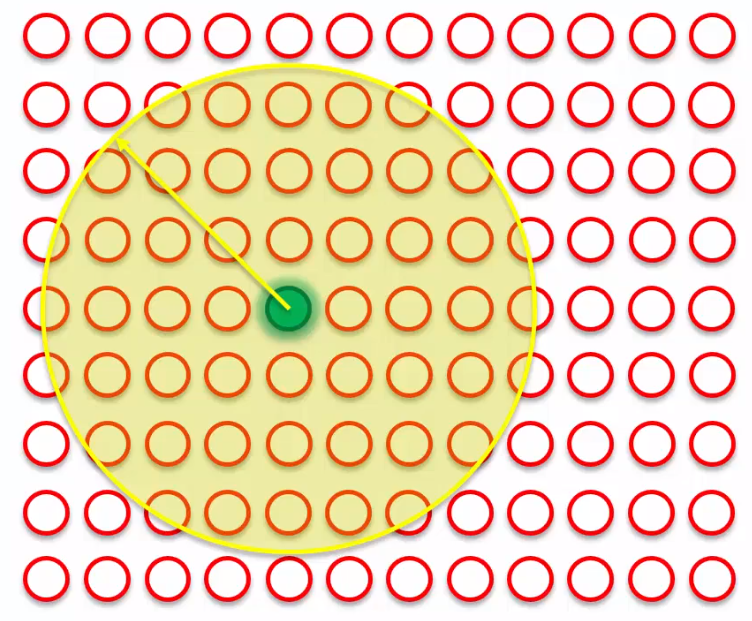

In [7]:
from IPython.display import Image, display_png
display_png(Image('figure3.PNG'))

figure 3. copyright:SuperDataScience

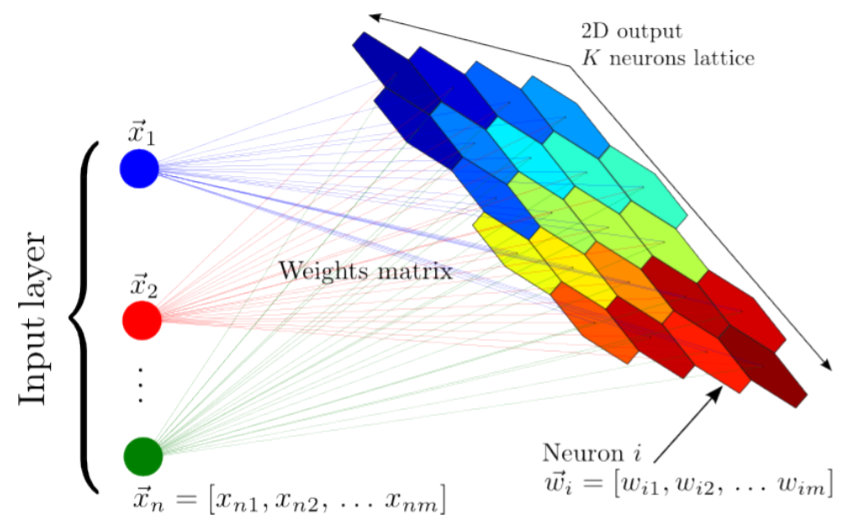

In [3]:
from IPython.display import Image, display_png
display_png(Image('schematicRepresentation.PNG'))

figure 4. source: https://arxiv.org/pdf/1312.5753.pdf

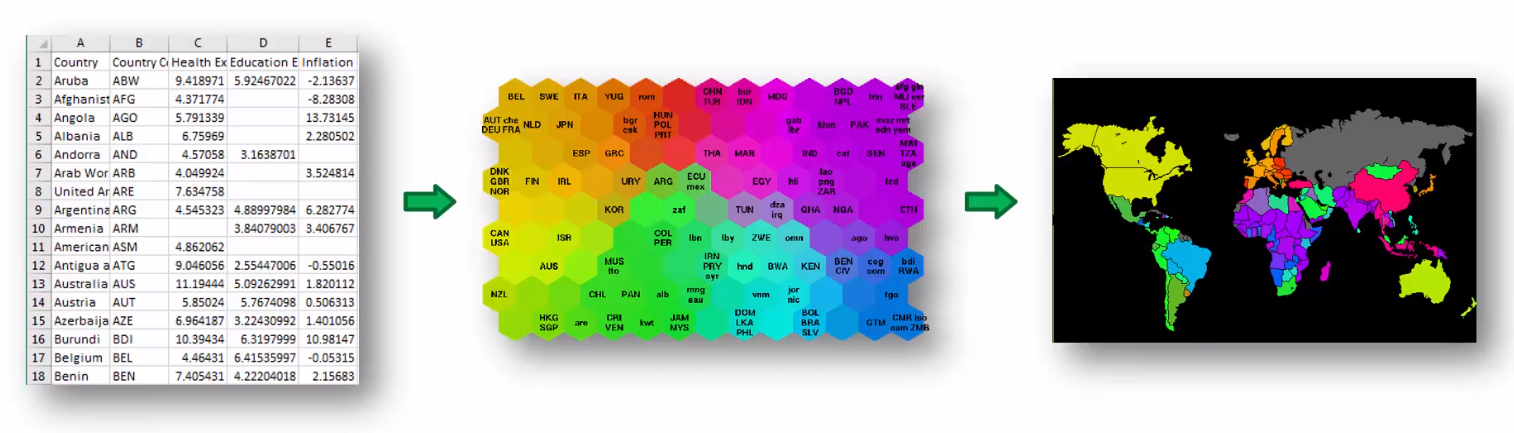

In [89]:
from IPython.display import Image, display_png
display_png(Image('WorldPovertyMap.PNG'))

figure 5. source: http://www.cis.hut.fi/research/som-research/worldmap.html

## Data import

we import the credit card customer data.
The objective of this analysis is to give potential cheating customers (classifying the fraudulent customers and normal ones), assuming the characteristics of cheating customer is significantly differnt from that of non-cheating ones.

The dataset and its description can be downloaded below.
http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

input variable (feature)
- A1: 0,1 CATEGORICAL (formerly: a,b) 
- A2: continuous. 
- A3: continuous. 
- A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
- A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
- A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
- A7: continuous. 
- A8: 1, 0 CATEGORICAL (formerly: t, f) 
- A9: 1, 0	CATEGORICAL (formerly: t, f) 
- A10: continuous. 
- A11: 1, 0	CATEGORICAL (formerly t, f) 
- A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
- A13: continuous. 
- A14: continuous. 
- A15: 1,2 class attribute (formerly: +,-)


In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
display(dataset)

# CustomerID to A14
X = dataset.iloc[:, :-1].values
#Class: 1 = the crediat card application approved, 0 = not approved
y = dataset.iloc[:, -1].values

#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
#normalized X
X = sc.fit_transform(X)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


## Train the model

In [26]:
#train the SOM with a third party library (https://pypi.org/project/MiniSom/#history) called minisom.py
from minisom import MiniSom
# x and y: length of the SOM grid (figure 3), input_len: number of features (x)
# sigma: radius of the updated neighbors on the grid, learning_rate: how many weighs are updated during each iteration 
som = MiniSom(x = 10, y = 10, input_len= 15, sigma = 1.0, learning_rate=0.5)

#initialize the weights
som.random_weights_init(X)

#train the som
# we pickup only 100 observation for training for now
som.train_random(data = X, num_iteration=100)

## visualize the model

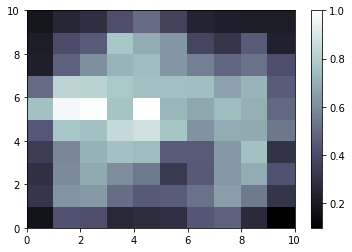

In [27]:
%matplotlib inline
--pylab inline
from pylab import bone, pcolor, colorbar, plot, show
bone()
#som.distance_map returns all MID (mean into winning node distances) for all nodes in one matrix. The higher, the more likely to be fraud (or outlier) because the large number mean the node is far from the other nodes.
# the coordinate is designated by (x, y) when not transposing it
# pcolor(som.distance_map().T)
pcolor(som.distance_map())
# show the legend depicting which value each color corresponds to. 
colorbar()
#We get SOM (segmentation of nodes)!! Each cell color corresponds to MID value.  

From the figure above, we can anticipate the white cell coordinates. White cells give the largest MID (= indicating outliers = potential frauds). 

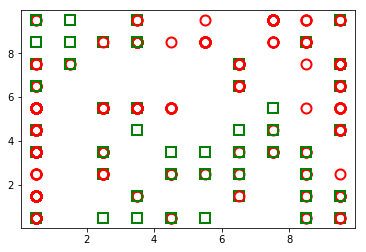

In [29]:
#add markers (red circle = not get approval, green square = get approval)
%matplotlib inline
--pylab inline
markers = ['o', 's']
colors = ['r', 'g']

# plot the markers (customers)
for i, x in enumerate (X):
#     return the winning node coordinate on the SOM figure for specific customers
    w = som.winner(x)
#    if the customer gets approval, y[i] = 1 and markers[y[i]] = 's', if the customer did not get approval, y[i] = 0 and markers[y[i]] = 'o'
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

By combining these figures, we get:

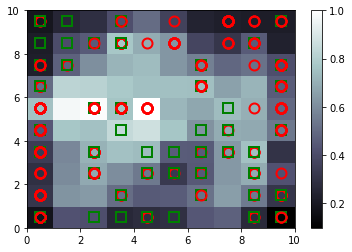

In [30]:
###############################################################
# the following code was just copied from the last two codes
###############################################################
%matplotlib inline
--pylab inline
from pylab import bone, pcolor, colorbar, plot, show
bone()
#som.distance_map returns all MID (mean into winning node distances) for all nodes in one matrix. The higher, the more likely to be fraud (or outlier) because the large number mean the node is far from the other nodes.
pcolor(som.distance_map().T)
# show the legend depicting which value each color corresponds to. 
colorbar()
#We get SOM (segmentation of nodes)!! Each cell color corresponds to MID value.  

#add markers (red circle = not get approval, green square = get approval)
markers = ['o', 's']
colors = ['r', 'g']

# plot the markers (customers)
for i, x in enumerate (X):
#     return the winning node coordinate on the SOM figure for specific customers
    w = som.winner(x)
#    if the customer gets approval, y[i] = 1 and markers[y[i]] = 's', if the customer did not get approval, y[i] = 0 and markers[y[i]] = 'o'
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

The customers we want to pay attention to are the ones located at the high MID cell because SOM is a classification model, and bankers want to figure out how to more correctly distinguish cheating customers and non-cheating ones (they do not need to care the customers who were truely classified)

## get the explicit list of the potential cheating customers

In [41]:
#find the frauds
# return all the node on the SOM and the customers data associated to each winning node
mappings = som.win_map(X)

#You need to manually determine the outlier winning node coordinate from the visualized figure
potentialFrauds = np.concatenate((mappings[2,5], mappings[4,5]), axis = 0)
# potentialFrauds = mappings[7,4]
#unscale the elements of all customers
unscaledPotentialFrauds = sc.inverse_transform(potentialFrauds)
print('Potentially fraudulent customers')
display(pd.DataFrame(unscaledPotentialFrauds))

Potentially fraudulent customers


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15705918.0,0.0,37.33,2.500,2.0,3.0,8.0,0.210,0.0,0.0,0.0,0.0,2.0,260.0,247.0
1,15575605.0,0.0,24.75,13.665,2.0,11.0,8.0,1.500,0.0,0.0,0.0,0.0,2.0,280.0,2.0
2,15675926.0,0.0,19.17,5.415,2.0,3.0,8.0,0.290,0.0,0.0,0.0,0.0,2.0,80.0,485.0
3,15593834.0,0.0,16.33,0.210,2.0,6.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,200.0,2.0
4,15599272.0,0.0,33.67,0.375,2.0,13.0,4.0,0.375,0.0,0.0,0.0,0.0,2.0,300.0,45.0
5,15660528.0,0.0,21.92,11.665,2.0,4.0,8.0,0.085,0.0,0.0,0.0,0.0,2.0,320.0,6.0
6,15609987.0,0.0,22.67,0.790,2.0,3.0,4.0,0.085,0.0,0.0,0.0,0.0,2.0,144.0,1.0
7,15666096.0,0.0,52.50,7.000,2.0,6.0,8.0,3.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0
8,15609758.0,0.0,20.75,9.540,2.0,3.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,200.0,1001.0
9,15611682.0,0.0,20.08,1.250,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0


now the banking analysts can prioritize these customers for investigation.

## Appendix: integration with ANN (Supservised learning)
In this prcoess, I combined ANN algorithm to the outcome of SOM to train the ANN assuming the potentially fraud customers are all fraud (labled as 1). 

In [4]:
# -*- coding: utf-8 -*-
#hybrid deep learning model (SOM + ANN)

##############################################
#part 1 identify teh faruds with the SOM
##############################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)


In [76]:
# Train the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

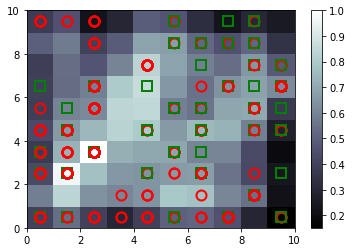

In [77]:
# Visualize the results
%matplotlib inline
--pylab inline
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [78]:
# show the coordinates of outliers
print(np.argwhere(som.distance_map() >= 0.9))
outliers = np.argwhere(som.distance_map() >= 0.9)
print(tuple(outliers))

[[1 2]
 [2 3]]
(array([1, 2], dtype=int64), array([2, 3], dtype=int64))


In [79]:
#find the frauds
mappings = som.win_map(X)

# get the coordinates of outliers
outliers = np.argwhere(som.distance_map() >= 0.9)

# get the customers who are at the outlier coordinates (larger than 0.9 MID)
#############################################################################################
# Caution!: you need to manually change the coordinate numbers according to the 'outliers' variable
# You need to pick up the ones only having the customers (read circle or green square).
#############################################################################################
potentialFrauds = np.concatenate((mappings[(1,2)], mappings[(2,3)]), axis = 0)
#############################################################################################
# TODO: modify the code someday if the coordinate lists can be substituted into the fnction automatically.
# the following code did not work
# potentialFrauds = np.concatenate(([mappings[tuple(outliers[i])] for i in range(outliers.shape[0]) if mappings[tuple(outliers[i])] > 1]), axis = 0)

# giving the error of:
#     TypeError: unorderable types: list() > int()
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-71-d1e60408f5ae> in <module>()
#       7 # get the customers who are at the outlier coordinates (larger than 0.9 MID)
#       8 # print(tuple([mappings[tuple(outliers[i])] for i in range(outliers.shape[0])]))
# ----> 9 potentialFrauds = np.concatenate(([mappings[tuple(outliers[i])] for i in range(outliers.shape[0]) if mappings[tuple(outliers[i])] > 1]), axis = 0)
#      10 # potentialFrauds = np.concatenate((mappings[(4,3)], mappings[(8,4)]), axis = 0)
#      11 

# <ipython-input-71-d1e60408f5ae> in <listcomp>(.0)
#       7 # get the customers who are at the outlier coordinates (larger than 0.9 MID)
#       8 # print(tuple([mappings[tuple(outliers[i])] for i in range(outliers.shape[0])]))
# ----> 9 potentialFrauds = np.concatenate(([mappings[tuple(outliers[i])] for i in range(outliers.shape[0]) if mappings[tuple(outliers[i])] > 1]), axis = 0)
#      10 # potentialFrauds = np.concatenate((mappings[(4,3)], mappings[(8,4)]), axis = 0)
#      11 

# TypeError: unorderable types: list() > int()
#############################################################################################

#unscale the elements of all customers
unscaledPotentialFrauds = sc.inverse_transform(potentialFrauds)


### (the process is fundamentally equivalent from this part)

### transfer from unsupervised to supervised learning

In [80]:
#create the matrix of features (indepependent variable)
#the customer ID wont help detecting faruds, but the approval descision may help
customers = dataset.iloc[:, :-1].values

#create the dependent variables
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0 ] in unscaledPotentialFrauds:
        is_fraud[i] = 1

#train the ANN
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

#make the ANN
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialise the ANN
classifier = Sequential()

# Add the input layer and the first hidden layer
# input_dim = number of features
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

#this layer was omitted just for simplicity and due to small number of dataset
## Add the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Add the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the ANN to the Training set (train the model)
#the numbers of dataset (690) and the features (15) are small for ANN, we do not need so many epochs and the batch size can be small. 
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)


(690,)
Epoch 1/2
690/690 [==============================] - 18s 26ms/step - loss: 0.3228 - acc: 1.0000
Epoch 2/2
690/690 [==============================] - 1s 843us/step - loss: 0.0321 - acc: 1.0000


## evaluate the model

In [87]:
# Predict the Test set results
y_pred = classifier.predict(customers)
#y_pred is originally a two dimentional array
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
#sort by the probability of fraud by descending order
y_pred_sorted = y_pred[y_pred[:, 1].argsort()[::-1]]

print('customer fraudulent ranking')
display(y_pred_sorted)

customer fraudulent ranking


array([[1.57257760e+07, 3.19021493e-01],
       [1.55941330e+07, 2.75877684e-01],
       [1.57486490e+07, 2.48586580e-01],
       ...,
       [1.56993400e+07, 1.47507935e-05],
       [1.57574340e+07, 1.36950493e-05],
       [1.57785890e+07, 1.35173241e-05]])

the top ranked customers potentially cheated with more probability.